# General Insights
This notebook will store additional insights and data visualization on our Wii balance board dataset. 

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Stylesheet
plt.style.use('seaborn-v0_8')

In [2]:
df = pd.read_csv('Wii_final.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   label                                         200 non-null    int64  
 1   age                                           200 non-null    int64  
 2   sex                                           200 non-null    int64  
 3   grip_r1                                       200 non-null    float64
 4   grip_l1                                       200 non-null    float64
 5   health_rating                                 200 non-null    int64  
 6   crouching_difficulty                          200 non-null    int64  
 7   lifting_difficulty                            200 non-null    int64  
 8   reaching_overhead_difficulty                  200 non-null    int64  
 9   walking_difficulty                            200 non-null    int

In [30]:
# defining the sigmoid curve manually
def sigmoid_curve(x):
    return 1 / (1 + np.exp(-x)) # exp(x) is the function to calculate e^x

We will investigate the odds ratio between various independant variables and see how it affects the probability of falling

# Ind. Variable - Age

We will only focus on `age` as the only independant variable and calculate the log odds ratio. The log odds ratio will give insights as to how an increase in a unit or year of age will affect the odds of falling. 

In [109]:
# Defining our X and y variables. We will only focus on age as an independant variable to calculate the log odds ratio
X = df["age"]
y = df["has_fallen"]

X_with_constant = sm.add_constant(X)

In [110]:
logreg = sm.Logit(y, X_with_constant)
logreg_results = logreg.fit()
logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.682879
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             has_fallen   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:               0.0006386
Time:                        16:55:12   Log-Likelihood:                -136.58
converged:                       True   LL-Null:                       -136.66
Covariance Type:            nonrobust   LLR p-value:                    0.6761
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9387      1.580     -0.594      0.552      -4.035       2.158
age            0.0080      0.019      0.418      0.676      -0.029       0.045
==============================================================================
"""

In [111]:
logreg_results.params

const   -0.938675
age      0.007973
dtype: float64

In [112]:
beta0 = logreg_results.params[0]
beta1 = logreg_results.params[1]

/var/folders/by/q5q2nj6n61d2st534v09l74c0000gp/T/ipykernel_73114/2194655301.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0 = logreg_results.params[0]
/var/folders/by/q5q2nj6n61d2st534v09l74c0000gp/T/ipykernel_73114/2194655301.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1 = logreg_results.params[1]


In [113]:
np.exp(beta0)

0.3911458443121404

In [114]:
np.exp(beta1)

1.0080048401608237

In [115]:
age_range = list(range(75,100)) # participants are aged 75-100 in the dataset
probability_of_falling_age = [] # placeholder array

for age in age_range:
    linear_combination = 0.007973*age - 0.938675 # plug in the parameters in our regression equation
    probability_of_fall = sigmoid_curve(linear_combination) # pass this into the sigmoid curve function. gives us p
    probability_of_not_fall = 1 - probability_of_fall
    odds_ratio = probability_of_fall/probability_of_not_fall
    probability_of_falling_age.append(probability_of_fall)
    

    print(f'An {age} years of age, the ')
    print(f'Probability of falling is: {probability_of_fall}')
    print(f'Odds ratio is: {odds_ratio}')
    print('')

An 75 years of age, the 
Probability of falling is: 0.4156394487227844
Odds ratio is: 0.7112722578797223

An 76 years of age, the 
Probability of falling is: 0.4175772503658932
Odds ratio is: 0.7169658991312172

An 77 years of age, the 
Probability of falling is: 0.41951760054850273
Odds ratio is: 0.7227051172350936

An 78 years of age, the 
Probability of falling is: 0.42146044250860903
Odds ratio is: 0.7284902770280849

An 79 years of age, the 
Probability of falling is: 0.42340571917973185
Odds ratio is: 0.7343217462673945

An 80 years of age, the 
Probability of falling is: 0.42535337319731376
Odds ratio is: 0.7401998956540737

An 81 years of age, the 
Probability of falling is: 0.4273033469051967
Odds ratio is: 0.7461250988565873

An 82 years of age, the 
Probability of falling is: 0.42925558236217226
Odds ratio is: 0.7520977325345671

An 83 years of age, the 
Probability of falling is: 0.43121002134860603
Odds ratio is: 0.7581181763627567

An 84 years of age, the 
Probability of 

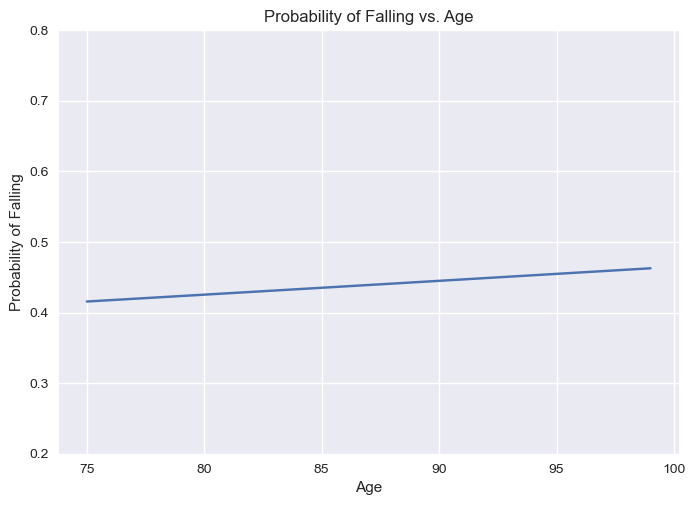

In [136]:
plt.figure()
plt.plot(age_range, probability_of_falling_age)
plt.ylim(0.2, 0.8)
plt.xlabel('Age')
plt.ylabel('Probability of Falling')
plt.title('Probability of Falling vs. Age')
plt.savefig('Probability_falling_age.png')
plt.show()

# Ind. Variable - Avg grip strength

In [77]:
X = df["avg_grip_strength"]
y = df["has_fallen"]

X_with_constant = sm.add_constant(X)

In [78]:
logreg = sm.Logit(y, X_with_constant)
logreg_results = logreg.fit()
logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.665040
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             has_fallen   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                 0.02674
Time:                        15:00:55   Log-Likelihood:                -133.01
converged:                       True   LL-Null:                       -136.66
Covariance Type:            nonrobust   LLR p-value:                  0.006858
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6516      0.380      1.714      0.086      -0.093       1.397
avg_grip_strength    -0.0464      0.018     -2.610      0.009      -0.081      -0.012
=====================================================================================
"""

In [79]:
logreg_results.params

const                0.651572
avg_grip_strength   -0.046364
dtype: float64

In [80]:
beta0 = logreg_results.params[0]
beta1 = logreg_results.params[1]

/var/folders/by/q5q2nj6n61d2st534v09l74c0000gp/T/ipykernel_73114/2194655301.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta0 = logreg_results.params[0]
/var/folders/by/q5q2nj6n61d2st534v09l74c0000gp/T/ipykernel_73114/2194655301.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta1 = logreg_results.params[1]


In [82]:
np.exp(beta1)

0.9546940095776347

Odds ratio: 0.95

For every one unit increase in average grip strength, the odds of a senior falling decreases by a factor 0.05

In [94]:
grip_range = list(range(0,41))
probability_of_falling_grip = []

for grip in grip_range:
    linear_combination = -0.046364*grip + 0.651572
    probability_of_fall = sigmoid_curve(linear_combination)
    probability_of_no_fall = 1 - probability_of_fall
    odds_ratio = probability_of_fall/probability_of_no_fall
    probability_of_falling_grip.append(probability_of_fall)

    print(f'At grip strength of: {grip}')
    print(f'Probability of fall is: {probability_of_fall}')
    print(f'Odds ratio is: {odds_ratio}')
    print('')

At grip strength of: 0
Probability of fall is: 0.6573646217942221
Odds ratio is: 1.9185544272647348

At grip strength of: 1
Probability of fall is: 0.6468469086941193
Odds ratio is: 1.831633148961616

At grip strength of: 2
Probability of fall is: 0.6361850220191441
Odds ratio is: 1.7486498921784916

At grip strength of: 3
Probability of fall is: 0.625387664173628
Odds ratio is: 1.6694262424489064

At grip strength of: 4
Probability of fall is: 0.6144640546718161
Odds ratio is: 1.5937918684826111

At grip strength of: 5
Probability of fall is: 0.6034239041201751
Odds ratio is: 1.5215841559523335

At grip strength of: 6
Probability of fall is: 0.5922773843010595
Odds ratio is: 1.452647857872061

At grip strength of: 7
Probability of fall is: 0.5810350945037862
Odds ratio is: 1.3868347608151563

At grip strength of: 8
Probability of fall is: 0.5697080242996426
Odds ratio is: 1.3240033662546626

At grip strength of: 9
Probability of fall is: 0.558307513006641
Odds ratio is: 1.264018586340

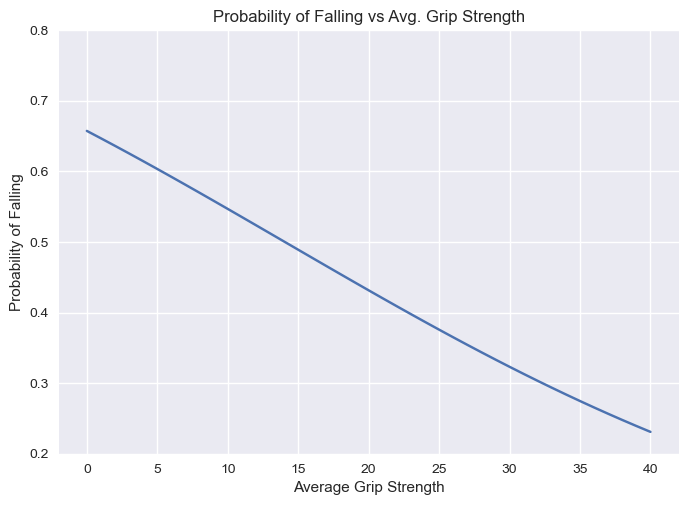

In [129]:
plt.figure
plt.plot(grip_range, probability_of_falling_grip)
plt.ylim(0.2, 0.8)
plt.xlabel('Average Grip Strength')
plt.ylabel('Probability of Falling')
plt.title('Probability of Falling vs Avg. Grip Strength')
plt.savefig('Probability_falling_avggrip.png')
plt.show()